In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

**13.4 -> Final test score: 0.614476, scoring metric: recall**

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# the imports below were added by us

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

1. This is a binary classification problem. The target value is whether the credit card will default (1) or not (0). The features we have to help us predict this target value is historical banking information (bill amounts, repayment statuses, previous payment amounts and limit balances), which we believe will be more useful than the rest of the features provided which are characteristics of the individuals (sex, marriage, education and age). 

In [3]:
# 2.
credit_df = pd.read_csv('data/creditaccounts.csv')
credit_df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [5]:
print("INFO")
train_df.info()

INFO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2             

In [6]:
print("DESCRIBE")
train_df.sort_index()
train_df.describe(include='all')

DESCRIBE


ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000    21000.000000  21000.000000  21000.000000  21000.000000   
mean   14962.348238   167880.651429      1.600762      1.852143      1.554000   
std     8650.734050   130202.682167      0.489753      0.792961      0.521675   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7498.750000    50000.000000      1.000000      1.000000      1.000000   
50%    14960.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22458.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      35.500810     -0.015429     -0.137095     -0.171619     -0.225238   
std        9.212644      1.120465      1.194506      1.196123      1.168556   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   21000.000000   21000.000000   21000.000000   21000.000000   
mean   ...   43486.610905   40428.518333   38767.202667    5673.585143   
std    ...   64843.303993   61187.200817   59587.689549   17033.241454   
min    ...  -50616.000000  -61372.000000 -339603.000000       0.000000   
25%    ...    2293.750000    1739.500000    1215.750000    1000.000000   
50%    ...   19102.500000   18083.000000   16854.500000    2100.000000   
75%    ...   54763.250000   50491.000000   49253.750000    5007.250000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   5.895027e+03    5311.432286    4774.021381    4751.850095   
std    2.180143e+04   18377.997079   15434.136142   15228.193125   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.200000e+02     390.000000     266.000000     234.000000   
50%    2.007000e+03    1809.500000    1500.000000    1500.000000   
75%    5.000000e+03    4628.500000    4021.250000    4016.000000   
max    1.227082e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   21000.000000                21000.000000  
mean     5237.762190                    0.223238  
std     18116.846563                    0.416427  
min         0.000000                    0.000000  
25%       110.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [7]:
print("CLASS IMBALANCE?")
train_df["default.payment.next.month"].value_counts()

CLASS IMBALANCE?


0    16312
1     4688
Name: default.payment.next.month, dtype: int64

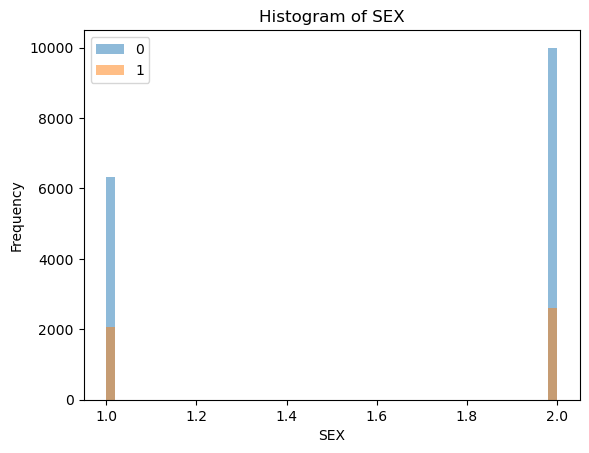

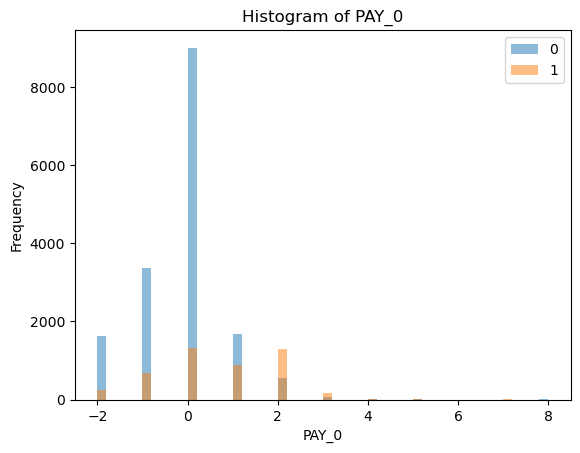

In [8]:
ax = train_df.groupby("default.payment.next.month")["SEX"].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel("SEX")
plt.title("Histogram of SEX")
plt.show()

ax = train_df.groupby("default.payment.next.month")["PAY_0"].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel("PAY_0")
plt.title("Histogram of PAY_0")
plt.show()

In [9]:
# EDUCATION shouldn't have values of 0 and MARRIAGE shouldn't have values of 0 either
# EDUCATION shouldn't have two values (5 and 6) representing "unkown" so I changed all the 6s to 5s

train_df["EDUCATION"] = train_df["EDUCATION"].replace(0, 5)
train_df["EDUCATION"] = train_df["EDUCATION"].replace(6, 5)
test_df["EDUCATION"] = test_df["EDUCATION"].replace(0, 5)
test_df["EDUCATION"] = test_df["EDUCATION"].replace(6, 5)

train_df["MARRIAGE"] = train_df["MARRIAGE"].replace(0, 3)
test_df["MARRIAGE"] = test_df["MARRIAGE"].replace(0, 3)

In [10]:
train_df.describe(include='all')

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000    21000.000000  21000.000000  21000.000000  21000.000000   
mean   14962.348238   167880.651429      1.600762      1.852857      1.558857   
std     8650.734050   130202.682167      0.489753      0.787218      0.521149   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7498.750000    50000.000000      1.000000      1.000000      1.000000   
50%    14960.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22458.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      5.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      35.500810     -0.015429     -0.137095     -0.171619     -0.225238   
std        9.212644      1.120465      1.194506      1.196123      1.168556   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   21000.000000   21000.000000   21000.000000   21000.000000   
mean   ...   43486.610905   40428.518333   38767.202667    5673.585143   
std    ...   64843.303993   61187.200817   59587.689549   17033.241454   
min    ...  -50616.000000  -61372.000000 -339603.000000       0.000000   
25%    ...    2293.750000    1739.500000    1215.750000    1000.000000   
50%    ...   19102.500000   18083.000000   16854.500000    2100.000000   
75%    ...   54763.250000   50491.000000   49253.750000    5007.250000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   5.895027e+03    5311.432286    4774.021381    4751.850095   
std    2.180143e+04   18377.997079   15434.136142   15228.193125   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.200000e+02     390.000000     266.000000     234.000000   
50%    2.007000e+03    1809.500000    1500.000000    1500.000000   
75%    5.000000e+03    4628.500000    4021.250000    4016.000000   
max    1.227082e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   21000.000000                21000.000000  
mean     5237.762190                    0.223238  
std     18116.846563                    0.416427  
min         0.000000                    0.000000  
25%       110.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [11]:
numeric_features = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
categorical_features = ["EDUCATION", "MARRIAGE"]
binary_features = ["SEX"]
drop_features = ["ID"]
passthrough_features = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
target = "default.payment.next.month"

In [12]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

# scaling
numeric_transformer = make_pipeline(StandardScaler())

# binary one hot encoding
binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary", dtype=int))

# one hot encoding
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore", sparse=False))

# column transformer
ct = make_column_transformer(
    (
        numeric_transformer,
        numeric_features,
    ),
    (
        binary_transformer,
        binary_features
    ),
    (
        categorical_transformer,
        categorical_features
    ),
    (
        "passthrough",
        passthrough_features
    ),
    (
        "drop",
        drop_features
    )
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy_df = pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score=True))
dummy_df

fit_time  score_time  test_score  train_score
0  0.006186    0.000839    0.776905     0.776726
1  0.002514    0.000589    0.776905     0.776726
2  0.002014    0.000532    0.776667     0.776786
3  0.002191    0.000420    0.776667     0.776786
4  0.001744    0.000459    0.776667     0.776786

In [15]:
from sklearn.metrics import confusion_matrix

dummy.fit(X_train, y_train)
predictions = dummy.predict(X_train)
TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()

print("TN: " + str(TN),"FP: " + str(FP),"FN: " + str(FN),"TP: " + str(TP))

# recall = TP / (TP + FN)
# print("Recall: %0.4f" % (recall))
# precision = TP / (TP + FP)
# print("Precision: %0.4f" % (precision))

TN: 16312 FP: 0 FN: 4688 TP: 0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [16]:
from sklearn.linear_model import LogisticRegression

scores_dict_lr = {
    "C": 10.0 ** np.arange(-3, 3, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "mean_cv_scores_sd": list(),
    "recall": list(),
    "precision": list()
}

for C in scores_dict_lr["C"]:
    pipe_lr = make_pipeline(
        ct,
        LogisticRegression(max_iter=1000, C=C, class_weight={0:1, 1:4}),
    )
    scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True, scoring="recall")
    scores_dict_lr["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict_lr["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict_lr["mean_cv_scores_sd"].append(scores["test_score"].std())
    
    pipe_lr.fit(X_train, y_train)
    predictions = pipe_lr.predict(X_train)
    TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()
    
    scores_dict_lr["recall"].append(TP / (TP + FN))
    scores_dict_lr["precision"].append(TP / (TP + FP))

results_df = pd.DataFrame(scores_dict_lr)
results_df

C  mean_train_scores  mean_cv_scores  mean_cv_scores_sd    recall  \
0    0.001           0.719976        0.716293           0.013792  0.716937   
1    0.010           0.711284        0.708828           0.016191  0.712031   
2    0.100           0.711604        0.709041           0.014718  0.712031   
3    1.000           0.712244        0.709895           0.013762  0.712671   
4   10.000           0.712297        0.709895           0.013762  0.712671   
5  100.000           0.712297        0.709895           0.013762  0.712457   

   precision  
0   0.320584  
1   0.327383  
2   0.326678  
3   0.326365  
4   0.326333  
5   0.326299

In [17]:
pipe_lr = make_pipeline(
        ct,
        LogisticRegression(max_iter=1000, C=10, class_weight={0:1, 1:3.5}),
)

pipe_lr.fit(X_train, y_train)
predictions = pipe_lr.predict(X_train)
TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()

print("TN: " + str(TN), "FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

TN: 11270 FP: 5042 FN: 1642 TP: 3046


We tried several C values for optimizing the LogisticRegression model but recall and precision scores stayed relatively similar irrespective of the C values at 64% for recall and 37% to 38% for precision. This isn't great.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [18]:
# random forest
from sklearn.ensemble import RandomForestClassifier

scores_dict_rf = {
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "mean_cv_scores_sd": list(),
    "mean_fit_time": list()
}

pipe_rf = make_pipeline(
    ct, RandomForestClassifier(random_state=123, n_jobs=-1, class_weight={0:1, 1:3.5})
)

scores = cross_validate(pipe_rf, X_train, y_train, return_train_score=True, scoring="recall")
scores_dict_rf["mean_train_scores"].append(scores["train_score"].mean())
scores_dict_rf["mean_cv_scores"].append(scores["test_score"].mean())
scores_dict_rf["mean_cv_scores_sd"].append(scores["test_score"].std())
scores_dict_rf["mean_fit_time"].append(scores["fit_time"].mean())

results_df = pd.DataFrame(scores_dict_rf)
results_df


mean_train_scores  mean_cv_scores  mean_cv_scores_sd  mean_fit_time
0           0.999787        0.345565           0.006638       1.641539

In [19]:
# lgbm
from lightgbm.sklearn import LGBMClassifier

scores_dict_lgbm = {
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "mean_cv_scores_sd": list(),
    "mean_fit_time": list()
}

pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123, class_weight={0:1, 1:3.5}))

scores = cross_validate(pipe_lgbm, X_train, y_train, return_train_score=True, scoring="recall")
scores_dict_lgbm["mean_train_scores"].append(scores["train_score"].mean())
scores_dict_lgbm["mean_cv_scores"].append(scores["test_score"].mean())
scores_dict_lgbm["mean_cv_scores_sd"].append(scores["test_score"].std())
scores_dict_lgbm["mean_fit_time"].append(scores["fit_time"].mean())

results_df = pd.DataFrame(scores_dict_lgbm)
results_df

mean_train_scores  mean_cv_scores  mean_cv_scores_sd  mean_fit_time
0           0.779331        0.624358           0.012578       0.723073

In [20]:
# SVM RBF

# EVEN THO SVM RBF IS USUALLY A BETTER MODEL, IT WOULD RUN WAY TOO SLOW SO INSTEAD OF USING SVC, OUR THIRD MODEL WILL BE KNN

# from sklearn.svm import SVC

# scores_dict_svm = {
#     "mean_train_scores": list(),
#     "mean_cv_scores": list(),
#     "mean_cv_scores_sd": list(),
#     "recall": list(),
#     "precision": list()
# }

# pipe_svm = make_pipeline(
#     ct, SVC(gamma=0.01, class_weight={0:1, 1:3.5})
# )

# scores = cross_validate(pipe_svm, X_train, y_train, return_train_score=True)
# scores_dict_svm["mean_train_scores"].append(scores["train_score"].mean())
# scores_dict_svm["mean_cv_scores"].append(scores["test_score"].mean())
# scores_dict_svm["mean_cv_scores_sd"].append(scores["test_score"].std())

# pipe_svm.fit(X_train, y_train)
# predictions = pipe_svm.predict(X_train)
# TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()

# scores_dict_svm["recall"].append(TP / (TP + FN))
# scores_dict_svm["precision"].append(TP / (TP + FP))

# print("TN: " + str(TN), "FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))
# results_df = pd.DataFrame(scores_dict_svm)
# results_df

In [21]:
# knn
from sklearn.neighbors import KNeighborsClassifier

scores_dict_knn = {
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "mean_cv_scores_sd": list(),
    "mean_fit_time": list()
}

pipe_knn = make_pipeline(ct, KNeighborsClassifier())

scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True, scoring="recall")
scores_dict_knn["mean_train_scores"].append(scores["train_score"].mean())
scores_dict_knn["mean_cv_scores"].append(scores["test_score"].mean())
scores_dict_knn["mean_cv_scores_sd"].append(scores["test_score"].std())
scores_dict_knn["mean_fit_time"].append(scores["fit_time"].mean())

results_df = pd.DataFrame(scores_dict_lgbm)
results_df


# pipe_knn.fit(X_train, y_train)
# predictions = pipe_knn.predict(X_train)
# TN, FP, FN, TP = confusion_matrix(y_train, predictions).ravel()

# scores_dict_knn["recall"].append(TP / (TP + FN))
# scores_dict_knn["precision"].append(TP / (TP + FP))

# print("TN: " + str(TN), "FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))

mean_train_scores  mean_cv_scores  mean_cv_scores_sd  mean_fit_time
0           0.779331        0.624358           0.012578       0.723073

RandomForestClassifier seems to be highly overfitted as it's returning an almost perfect recall score during training but a much lower mean cv score at 35%. The LGBM classifier and KNN model are both fairly similar in terms of fit as their both returning fairly similar values of mean train scores at 77% and cv score at 62%. The fit time is also similar between the LGBM and KNN models at about half the time as the RandomForestClassifier.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'randomforestclassifier__n_estimators': np.arange(1, 100, 5),
              'randomforestclassifier__max_depth': np.arange(1, 100, 5),
              'randomforestclassifier__max_features': np.arange(1, 100, 5)
             }

pipe_rf = make_pipeline(
    ct, RandomForestClassifier(random_state=123, n_jobs=-1, class_weight={0:1, 1:3.5})
)

random_search = RandomizedSearchCV(
    pipe_rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, n_jobs=1, scoring="recall"
)

random_search.fit(X_train, y_train);

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "param_randomforestclassifier__max_features",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score                                   1         2         3   \
mean_test_score                             0.593428  0.586387  0.396967   
param_randomforestclassifier__n_estimators        36        71         1   
param_randomforestclassifier__max_depth            6         6        51   
param_randomforestclassifier__max_features         6        46        46   
mean_fit_time                               0.344565  1.485824   0.32698   

rank_test_score                                   4         5         6   \
mean_test_score                             0.386731  0.356439  0.356225   
param_randomforestclassifier__n_estimators        81        91        81   
param_randomforestclassifier__max_depth           21        61        46   
param_randomforestclassifier__max_features        11        56        36   
mean_fit_time                               1.594385  3.712694  3.549903   

rank_test_score                                   7         8         9   \
mean_test_score                             0.349614  0.348549  0.344498   
param_randomforestclassifier__n_estimators        66        36        46   
param_randomforestclassifier__max_depth           46        36        31   
param_randomforestclassifier__max_features        46        76         6   
mean_fit_time                               3.013443  1.610933   0.66005   

rank_test_score                                   10  
mean_test_score                             0.305246  
param_randomforestclassifier__n_estimators         6  
param_randomforestclassifier__max_depth           36  
param_randomforestclassifier__max_features        51  
mean_fit_time                               0.446592

In [23]:
param_grid = {'lgbmclassifier__n_estimators': np.arange(2, 100, 5)}

pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123, class_weight={0:1, 1:3.5}))

random_search = RandomizedSearchCV(
    pipe_lgbm, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, n_jobs=1, scoring="recall"
)

random_search.fit(X_train, y_train);

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score                           1         2         3         4   \
mean_test_score                      0.63161  0.630971  0.628838  0.628838   
param_lgbmclassifier__n_estimators        22        32        72        37   
mean_fit_time                       0.198349  0.263752  0.523911  0.290509   

rank_test_score                           5         6         7         8   \
mean_test_score                     0.628838  0.627344   0.62692  0.626917   
param_lgbmclassifier__n_estimators        42        47         7        82   
mean_fit_time                        0.32269  0.349046  0.100705  0.570011   

rank_test_score                           9         10  
mean_test_score                     0.625851  0.624145  
param_lgbmclassifier__n_estimators        87        92  
mean_fit_time                       0.592683  0.614312

In [24]:
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1,15))}

pipe_knn = make_pipeline(ct, KNeighborsClassifier())

random_search = RandomizedSearchCV(
    pipe_knn, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, n_jobs=1, scoring="recall"
)

random_search.fit(X_train, y_train);

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_kneighborsclassifier__n_neighbors",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score                                1         2         3   \
mean_test_score                          0.389722  0.365824  0.357934   
param_kneighborsclassifier__n_neighbors         1         3         5   
mean_fit_time                            0.027497  0.026282  0.025785   

rank_test_score                                4         5         6   \
mean_test_score                          0.357297  0.350257  0.349828   
param_kneighborsclassifier__n_neighbors         7        11         9   
mean_fit_time                            0.026166  0.026686  0.027812   

rank_test_score                                7         8         9   \
mean_test_score                          0.310794  0.309938   0.30866   
param_kneighborsclassifier__n_neighbors        12        10         8   
mean_fit_time                             0.02521  0.025678  0.025659   

rank_test_score                                10  
mean_test_score                          0.215018  
param_kneighborsclassifier__n_neighbors         2  
mean_fit_time                            0.025629

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

In [64]:
import eli5
from matplotlib import pyplot

ct.fit(X_train)

ohe_columns = (
    ct.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
).tolist()

new_columns = (numeric_features + ohe_columns + binary_features + passthrough_features)

pipe_lgbm = make_pipeline(ct, LGBMClassifier(n_estimators=22, random_state=123, class_weight={0:1, 1:3.5}))
pipe_lgbm.fit(X_train, y_train)

eli5.explain_weights(
    pipe_lgbm.named_steps["lgbmclassifier"], feature_names=new_columns
)



# pipe_lgbm.steps[1][1].booster_.feature_name()

# # ohe_feats = (
# #     ct.named_transformers_["pipeline"]
# #     .named_steps["onehotencoder"]
# #     .get_feature_names_out(categorical_features)
# # ).tolist()

# # eli5.explain_weights(
# #     pipe_lgbm.named_steps["lgbmclassifier"], feature_names=numeric_features+passthrough+o
# # )

# importance = pipe_lgbm.named_steps["lgbmclassifier"].feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

Explanation(estimator='LGBMClassifier(class_weight={0: 1, 1: 3.5}, n_estimators=22, random_state=123)', description='\nLightGBM feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='PAY_0', weight=0.5825479934957869, std=None, value=None), FeatureWeight(feature='LIMIT_BAL', weight=0.045377556525261174, std=None, value=None), FeatureWeight(feature='PAY_AMT2', weight=0.040580574810672634, std=None, value=None), FeatureWeight(feature='BILL_AMT1', weight=0.0403397292487293, std=None, value=None), FeatureWeight(feature='PAY_3', weight=0.03311201179880572, std=None, value=None), FeatureWeight(feature='PAY_AMT3', weight=0.030009378413505497, std=None, value=None), FeatureWeight(feature='PAY_2', weight=0.027095805517675157, std=None, value=None), FeatureWeight(feature='PAY_AMT1', weight=0.024282135954348288, std=None, value=None), FeatureWeight(feature='PAY_4', weight=0.023874869603530788, std=None, value=None), FeatureWeight(feature='PAY_AMT4', weight=0.021917708120834677, std=None, value=None), FeatureWeight(feature='PAY_6', weight=0.019205430443445443, std=None, value=None), FeatureWeight(feature='BILL_AMT2', weight=0.01640180144166764, std=None, value=None), FeatureWeight(feature='PAY_5', weight=0.015936671759941422, std=None, value=None), FeatureWeight(feature='AGE', weight=0.011942012042618773, std=None, value=None), FeatureWeight(feature='BILL_AMT6', weight=0.01184046432925837, std=None, value=None), FeatureWeight(feature='PAY_AMT5', weight=0.010741882465134434, std=None, value=None), FeatureWeight(feature='PAY_AMT6', weight=0.009849476820621927, std=None, value=None), FeatureWeight(feature='BILL_AMT3', weight=0.009426334555768745, std=None, value=None), FeatureWeight(feature='BILL_AMT4', weight=0.006851802693334065, std=None, value=None), FeatureWeight(feature='BILL_AMT5', weight=0.004059142516670571, std=None, value=None)], remaining=9), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

In [40]:
pipe_lgbm = make_pipeline(ct, LGBMClassifier(n_estimators=22 ,random_state=123, class_weight={0:1, 1:3.5}))
scores = cross_validate(pipe_lgbm, X_test, y_test, return_train_score=True, scoring="recall")
pd.DataFrame(scores).mean()

fit_time       0.208431
score_time     0.011050
test_score     0.614476
train_score    0.757829
dtype: float64

2. The mean test score on the test data is relatively close to the cv score we got during training (0.614476 vs 0.63161). We haven't broken the golden rule so seeing scores that are so close gives as some reassurance that our results are genuine but we're getting a higher train score which makes me think there might be some overfitting or optimization bias as the training data has been seen so many times.

In [62]:
import shap
import matplotlib.pyplot as plt
%matplotlib inline

X_train_enc = pd.DataFrame(
    data=ct.transform(X_train),
    columns=new_columns,
    index=X_train.index,
)
X_train_enc.head()

X_test_enc = pd.DataFrame(
    data=ct.transform(X_test),
    columns=new_columns,
    index=X_test.index,
)
X_test_enc.shape

y_test_reset = y_test.reset_index(drop=True)
y_test_reset

default_ind = y_test_reset[y_test_reset == 1].index.tolist()
not_default_ind = y_test_reset[y_test_reset == 0].index.tolist()

default_index = default_ind[10]
not_default_index = not_default_ind[10]

lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmclassifier"])
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

shap.initjs()

shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[1][default_ind, :],
    X_test_enc.iloc[default_ind, :],
    # matplotlib=True      THIS THROWS AN ERROR AND NOT HAVING THIS PARAMETER ENDS UP DISPLAYING A PLOT I CAN'T UNDERSTAND
)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

In [70]:
pipe_lgbm.fit(X_train, y_train)
predictions = pipe_lgbm.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

scores_dict_lgbm_final = {
    "recall": list(),
    "precision": list(),
    "f1": list()
}

scores_dict_lgbm_final["recall"].append(TP / (TP + FN))
scores_dict_lgbm_final["precision"].append(TP / (TP + FP))
scores_dict_lgbm_final["f1"].append(2 * ((scores_dict_lgbm_final["precision"][0] * scores_dict_lgbm_final["recall"][0])/(scores_dict_lgbm_final["precision"][0] + scores_dict_lgbm_final["recall"][0])))

print("TN: " + str(TN), "FP: " + str(FP), "FN: " + str(FN), "TP: " + str(TP))
results_df = pd.DataFrame(scores_dict_lgbm_final)
results_df

TN: 5651 FP: 1401 FN: 752 TP: 1196


recall  precision        f1
0  0.613963   0.460531  0.526293

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Congratulations on finishing this project. This was a tricky one but you did it!

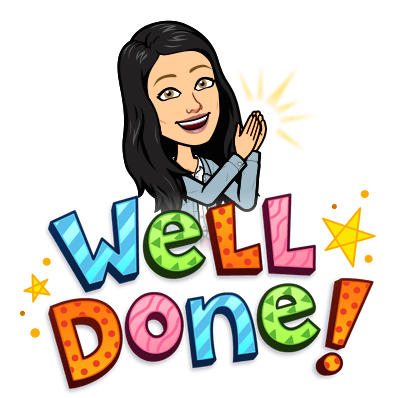

In [27]:
from IPython.display import Image

Image("img/eva-well-done.png")